# Персонализация предложений в интернет-магазине "В один клик"

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Методология решения задачи**

1. Промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
    
Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.

3. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

**Описание данных**

Мы имеем 4 файла (датафрейма):

**1. market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**2. market_money.csv**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

**3. market_time.csv**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

**4. money.csv**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

**План проекта:**

**[1. Загрузка данных](#section_1)**

**[2. Предобработка данных](#section_2)**

**[3. Исследовательский анализ данных](#section_3)**

**[4. Объединение таблиц](#section_4)**

**[5. Корреляционный анализ](#section_5)**

**[6. Использование пайплайнов](#section_6)**

**[7. Анализ важности признаков](#section_7)**

**[8. Сегментация покупателей](#section_8)**

**[9. Общий вывод](#section_9)**

## Загрузка данных
<a id='section_1'></a>

### Загрузка библиотек и датафреймов

In [4]:
# Избавились от сообщений предупреждающих об ошибке
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Загрузка библиотек

import pandas as pd
import seaborn as sns
import numpy as np
import shap

from matplotlib import pyplot as plt

from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, f1_score, fbeta_score, make_scorer

In [6]:
#Загрузка датафреймов
market = pd.read_csv('/datasets/market_file.csv')
m_money = pd.read_csv('/datasets/market_money.csv')
time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

### Первичный просмотр данных

#### market

In [7]:
#Общая информация market
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [8]:
#Первые 5 строк market
market.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

#### m_money

In [9]:
#Общая информация m_money
m_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [10]:
#Первые 5 строк m_money
m_money.head()

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

#### time

In [11]:
#Общая информация time
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [12]:
#Первые 5 строк time
time.head()

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

#### money

In [13]:
#Общая информация money
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [14]:
#Первые 5 строк money
money.head()

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

### Приведение к snake_case названий столбцов

In [15]:
#Функция для приведения названий столбцов к snake_case
def bringing_to_snake_case(df):
    cols = df.columns
    new_cols = []
    for col in cols:
        new_cols.append(col.replace(' ', '_').lower())
    df.rename(columns=dict(zip(df.columns, new_cols)), inplace=True)

In [16]:
#Приведение названий столбцов market к snake_case
bringing_to_snake_case(market)
market.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

In [17]:
#Приведение названий столбцов m_money к snake_case
bringing_to_snake_case(m_money)
m_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [18]:
#Приведение названий столбцов time к snake_case
bringing_to_snake_case(time)
time.columns

Index(['id', 'период', 'минут'], dtype='object')

In [19]:
#Приведение названий столбцов money к snake_case
bringing_to_snake_case(money)
money.columns

Index(['id', 'прибыль'], dtype='object')

### **Вывод**

1. Загрузили данные из 4х датафреймов.
2. Привели названия столбцов к snake_case.

Типы данных:
1. **market** (1300 записи)
    - Категориальные: id, покупательская_активность, тип_сервиса, разрешить_сообщать, популярная_категория.
    - Колличественные: маркет_актив_6_мес, маркет_актив_тек_мес, длительность, акционные_покупки, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал, ошибка_сервиса, страниц_за_визит.
2. **m_money** (3900 записей)
    - Категориальные: id, период.
    - Колличественные: выручка.
3. **time** (2600 записей)
    - Категориальные: id, период. 
    - Колличественные: минут.
4. **money** (1300 записей)
    - Категориальные: id. 
    - Колличественные: прибыль.
    
Пропуски отсутствуют.

## Предобработка данных
<a id='section_2'></a>

### Поиск и устранение неявных дубликатов и приведение категориальных признаков к одномцу виду

In [20]:
#Функция для вывода уникальных значений столбцов
def unique_values(df, cols):
    for col in cols:
        print(f'{col}:', df[col].unique())

In [21]:
#Функция для приведения категориальных значний к единому виду
def columns_to_view(df, cols):
    for col in cols:
        df[col] = df[col].str.lower()
        df[col] = df[col].str.replace(' ', '_')

#### market

In [22]:
#Уникальные значения категориальных столбцов
cols=['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
columns_to_view(market, cols)
unique_values(market, cols)

покупательская_активность: ['снизилась' 'прежний_уровень']
тип_сервиса: ['премиум' 'стандартт' 'стандарт']
разрешить_сообщать: ['да' 'нет']
популярная_категория: ['товары_для_детей' 'домашний_текстиль' 'косметика_и_аксесуары'
 'техника_для_красоты_и_здоровья' 'кухонная_посуда'
 'мелкая_бытовая_техника_и_электроника']


In [23]:
#Исправление неявных дублоикатов в столбце тип_сервиса
market['тип_сервиса'] = market['тип_сервиса'].str.replace('стандартт','стандарт')

In [24]:
#Более короткие названия категорий
market['популярная_категория'] = market['популярная_категория'].str.replace('товары_для_детей','детское')
market['популярная_категория'] = market['популярная_категория'].str.replace('домашний_текстиль','дом_текстиль')
market['популярная_категория'] = market['популярная_категория'].str.replace('косметика_и_аксесуары','красота')
market['популярная_категория'] = market['популярная_категория'].str.replace('техника_для_красоты_и_здоровья','тех_здоров')
market['популярная_категория'] = market['популярная_категория'].str.replace('кухонная_посуда','кухня')
market['популярная_категория'] = market['популярная_категория'].str.replace('мелкая_бытовая_техника_и_электроника','электроника')

#### m_money

In [25]:
#Уникальные значения категориальных столбцов
cols = ['период']
columns_to_view(m_money, cols)
unique_values(m_money, cols)

период: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


#### time

In [26]:
#Уникальные значения категориальных столбцов
cols=['период']
columns_to_view(time, cols)
unique_values(time, cols)

период: ['текущий_месяц' 'предыдцщий_месяц']


In [27]:
#Исправление ошибок в столбце период
time['период'] = time['период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

### Поиск и устранение явных дубликатов 

In [28]:
def obvious_duplicates(dfs, dfs_names):
    for df, df_name in zip(dfs, dfs_names):
        print(f'Кол-во явных дубликатов в {df_name}: {df.duplicated().sum()}')

In [29]:
# Кол-во явных дубликатов в датафреймах
dfs_list = [market, m_money, time, money]
dfs_names_list = ['market', 'm_money', 'time', 'money']
obvious_duplicates(dfs_list, dfs_names_list)

Кол-во явных дубликатов в market: 0
Кол-во явных дубликатов в m_money: 0
Кол-во явных дубликатов в time: 0
Кол-во явных дубликатов в money: 0


In [30]:
#Дубликаты
m_money[m_money.duplicated()]

Empty DataFrame
Columns: [id, период, выручка]
Index: []

In [31]:
# Избавление от явных дубликатов
m_money = m_money.drop_duplicates().reset_index(drop=True)
len(m_money)

3900

### **Вывод**

1. Были устранены ненявные дубликаты и орфографические ошибки в категориальных признаках.
2. Категориальные признаки были приведены к snake_case для более удобной работы с ними в будущем.
3. Быдо устранено 5 явных дубликатов в датафрейме m_money (осталось 3895 записей).

## Исследовательский анализ данных
<a id='section_3'></a>

In [32]:
#Функция выводящая гистограмму и диаграмму размаха для колличественных признаков
def hist_box(df, col):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(6)
    fig.set_figwidth(14)

    hist_graph = ax[0]
    boxplot_graph = ax[1]
    
    hist_graph.grid(True)
    boxplot_graph.grid(True)
    
    hist_graph.set_title(f'Гистограмма для {col}')
    boxplot_graph.set_title(f'Диаграмма размаха {col}')
    
    hist_graph.set_xlabel(col)
    hist_graph.set_ylabel('Кол-во пользователей')
    
    boxplot_graph.set_xlabel(col)
    boxplot_graph.yaxis.set_visible(False)
    
    sns.histplot(df, ax=hist_graph, x=col, bins=10, kde=True)
    sns.boxplot(data=df, ax=boxplot_graph, x=col)

    plt.show()

In [33]:
#Функция для постороения столбчатой и круговой диаграмм для категориальных данных
def bar_pie(df, col, values):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(4)
    fig.set_figwidth(14)
    
    piv = pd.pivot_table(df, index=col, values=values, aggfunc='count')
    
    bar = ax[0]
    pie = ax[1]
    
    sns.countplot(data=df, y=col, ax=bar)
    piv.plot(y=values, kind='pie', ax=pie, autopct='%1.1f%%', colors=sns.color_palette('muted') )
    
    pie.yaxis.set_visible(False)
    pie.get_legend().remove()
    
    bar.tick_params(labelrotation=0)
    bar.set_ylabel('Кол-во пользователей')
    bar.set_title(f'Столбчатая диаграмма для столбца: {col}')
    bar.grid(True)
    
    pie.set_title(f'Круговая диаграмма для столбца: {col}')

### Анализ market

#### Колличественные признаки 

In [34]:
#Describe для market
cols=[
        'маркет_актив_6_мес',
        'маркет_актив_тек_мес',
        'длительность',
        'акционные_покупки',
        'средний_просмотр_категорий_за_визит',
        'неоплаченные_продукты_штук_квартал',
        'ошибка_сервиса',
        'страниц_за_визит'
    ]
market[cols].describe()

маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
count         1300.000000           1300.000000   1300.000000   
mean             4.253769              4.011538    601.898462   
std              1.014814              0.696868    249.856289   
min              0.900000              3.000000    110.000000   
25%              3.700000              4.000000    405.500000   
50%              4.200000              4.000000    606.000000   
75%              4.900000              4.000000    806.000000   
max              6.600000              5.000000   1079.000000   

       акционные_покупки  средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

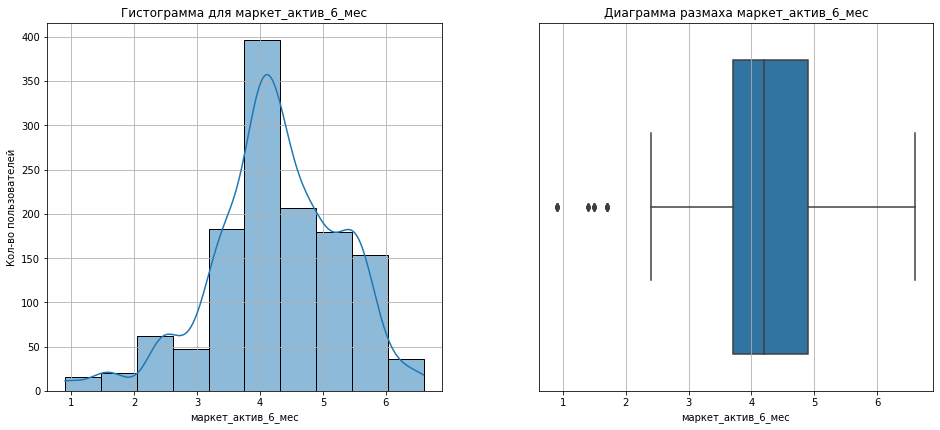

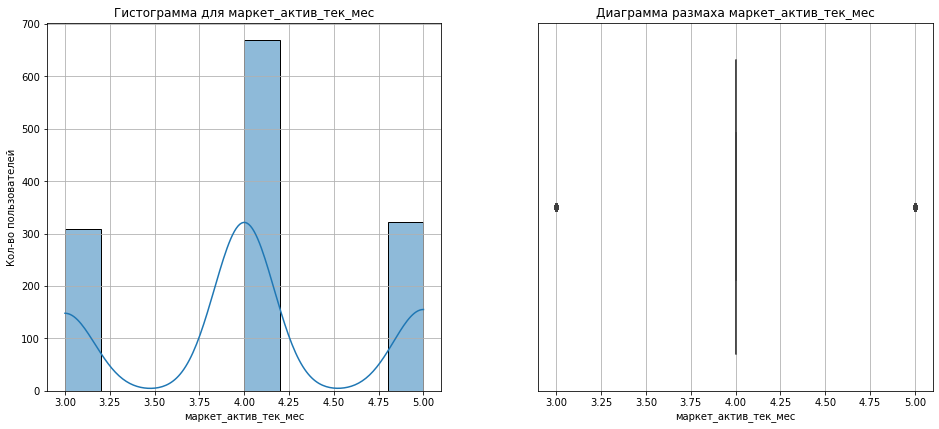

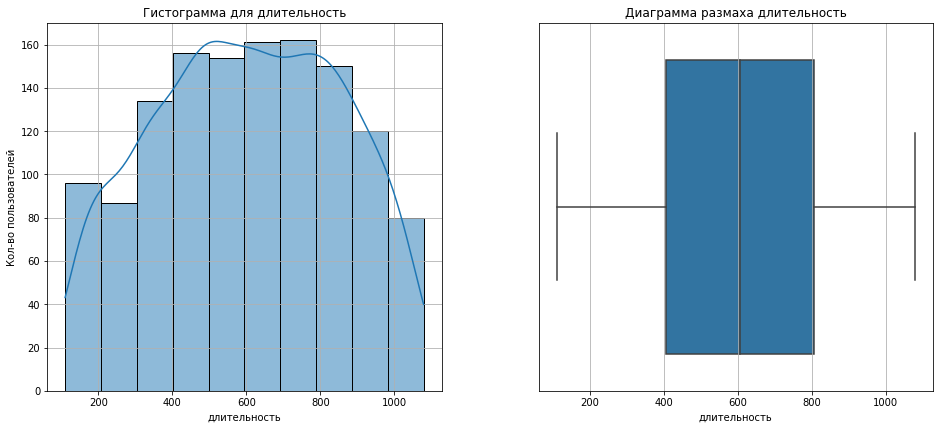

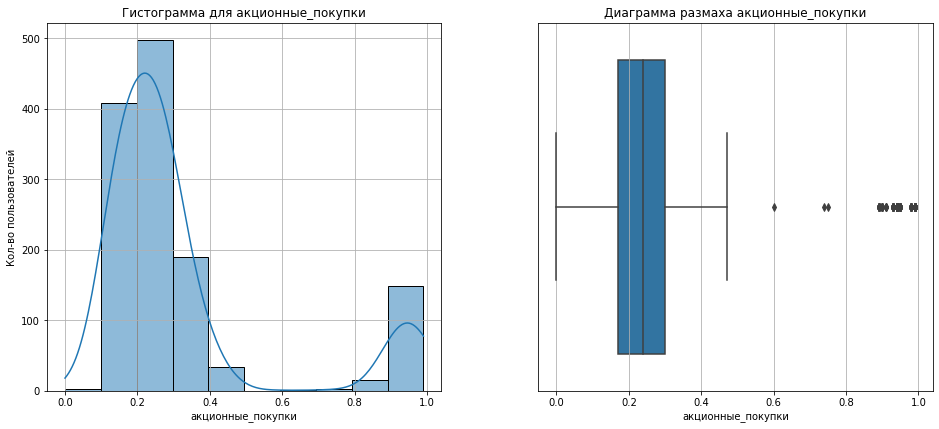

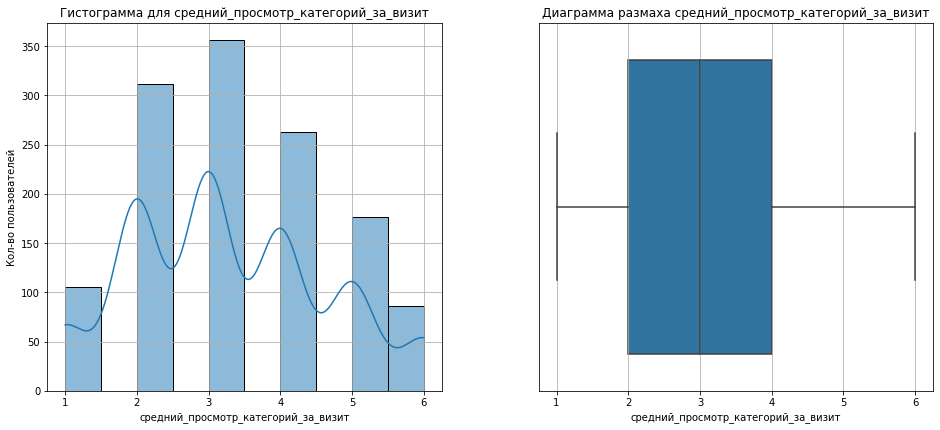

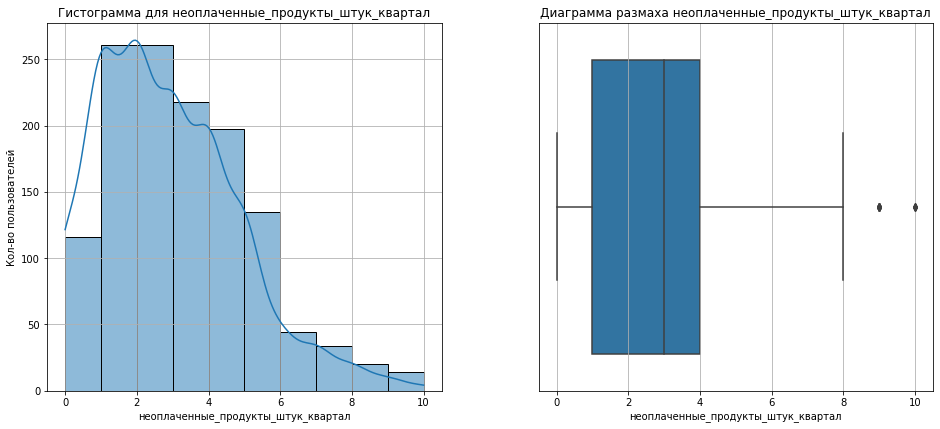

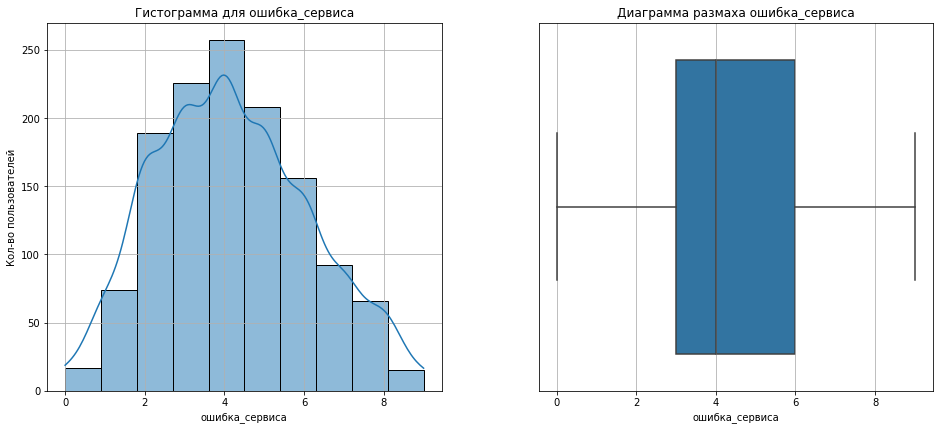

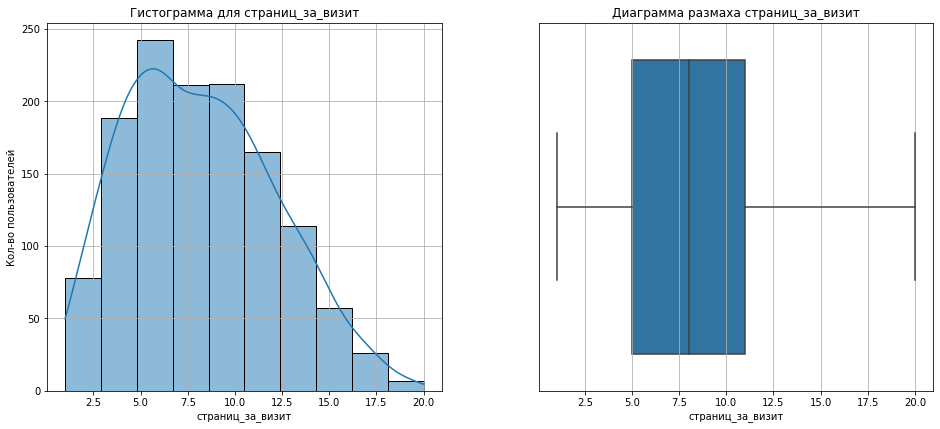

In [35]:
#Гистограммы и диаграммы размаха для колличественных признаков в market
cols=[
        'маркет_актив_6_мес',
        'маркет_актив_тек_мес',
        'длительность',
        'акционные_покупки',
        'средний_просмотр_категорий_за_визит',
        'неоплаченные_продукты_штук_квартал',
        'ошибка_сервиса',
        'страниц_за_визит'
    ]
for col in cols:
    hist_box(market, col)

#### Категориальные признаки

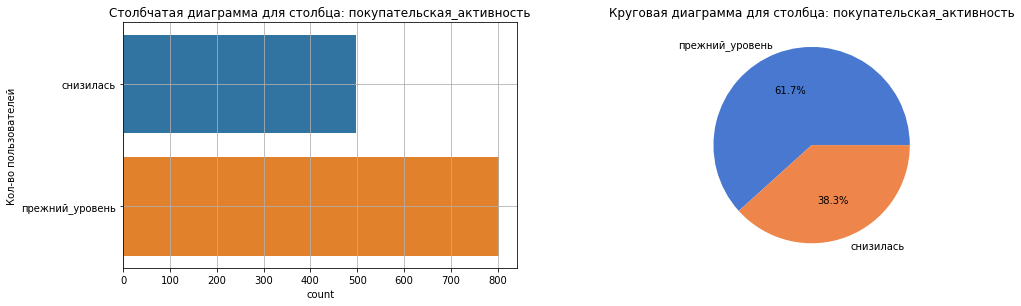

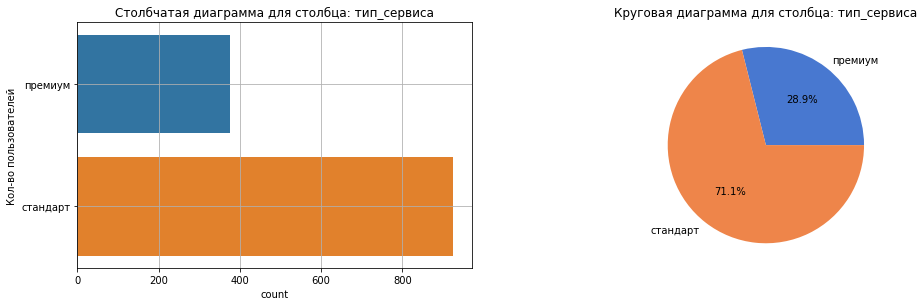

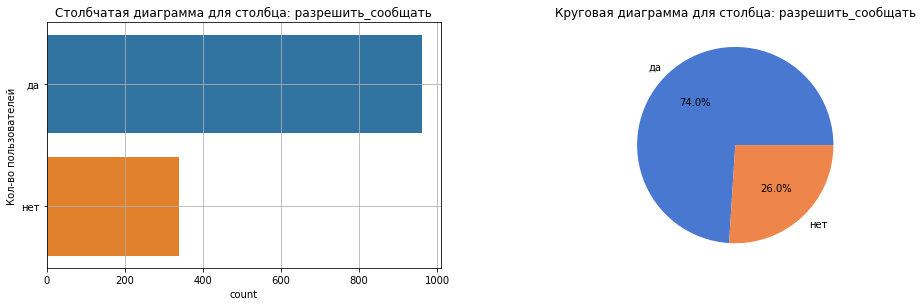

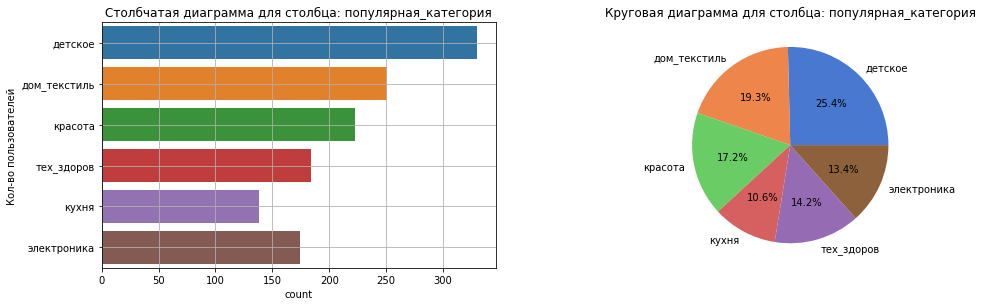

In [36]:
#Столбчатые и круговые диаграммы для категориальных данных из market
cols = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
for col in cols:
    bar_pie(market, col, 'id')

#### **Вывод по market**

**Колличественные признаки**

1. маркет_актив_6_мес: данные распредлены нормально с медианой в 4.2 и перекосом в большую сторону.
2. маркет_актив_тек_мес: всего 3 значения, можно сделать признак категориальным.
3. длительность: данные распределены нормально с медианой в 609 и высоким стандартным отклонением из-за чего график пбез резких перепадов.
4. акционные_покупки: вероятно пользователей можно разделить на 2 группы: на тех кто покупает товары только или почти только по акциям и все остальные, из-за этого у графика два пика на 0.3 и 1.
5. средний_просмотр_категорий_за_визит: данные распределены нормально с медианой в 3.
6. неоплаченные_продукты_штук_квартал: данные распределены нормально с медианой в 3, так же график имеет сильный уклон в большую сторону, что говорит о том, что у данных больших медианы большее стандартное отклонение, чем у данных меньше медианы.
7. ошибка_сервиса: данные распределены нормально с медианой в 4.
8. страниц_за_визит: данные распределены нормально с медианом в 7.5.

**Категориальные признаки**

1. покупательская_активность: на прежнем уровне осталось только 60% покупателей, у всеч остальных активность снизилась.
2. тип_сервиса: преобладает стандарт, целых 71.1%, все остальные почти 30% - премиум.
3. разрешить_сообщать: целых 74% покупателей разрешают присылать им дополнительные предложения о товарах.
4. популарная_категория: самая популярная категория у пользователей - детское, на 2ом месте домашний текстиль, на 3ем товары для красоты.

### Анализ m_money

#### Колличественные признаки 

In [37]:
#Describe для m_money
cols=['выручка']
m_money[cols].describe()

выручка
count    3900.000000
mean     5025.696051
std      1777.704104
min         0.000000
25%      4590.150000
50%      4957.500000
75%      5363.000000
max    106862.200000

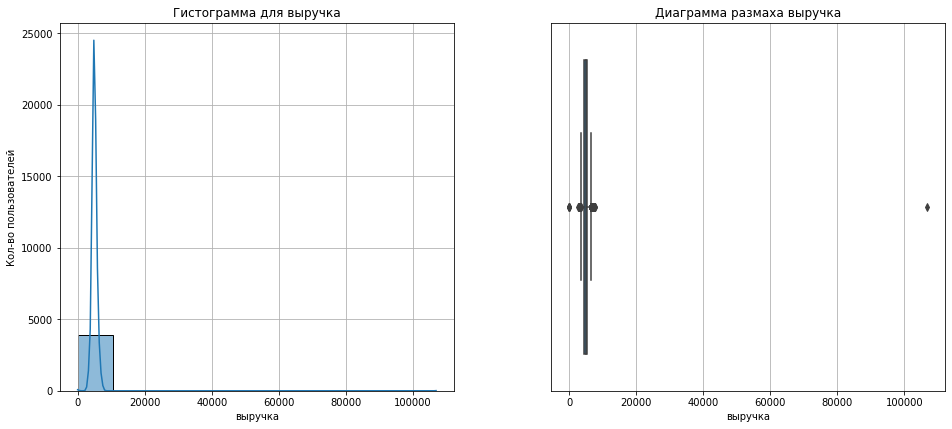

In [38]:
#Гистограммы и диаграммы размаха для колличественных признаков в m_money
cols=['выручка']
for col in cols:
    hist_box(m_money, col)

Есть аномальное значение выручки 106862, запомним его id для дальнейшего удаления этого пользователя из всех таблиц.

In [39]:
# Выброс
m_money.query('выручка > 20000')

id         период   выручка
98  215380  текущий_месяц  106862.2

In [40]:
# Запись id пользователя с выбросом для дальнейшего его удаления из всех таблиц
too_big_income_id = m_money.query('выручка > 20000')['id'].unique().tolist()
too_big_income_id

[215380]

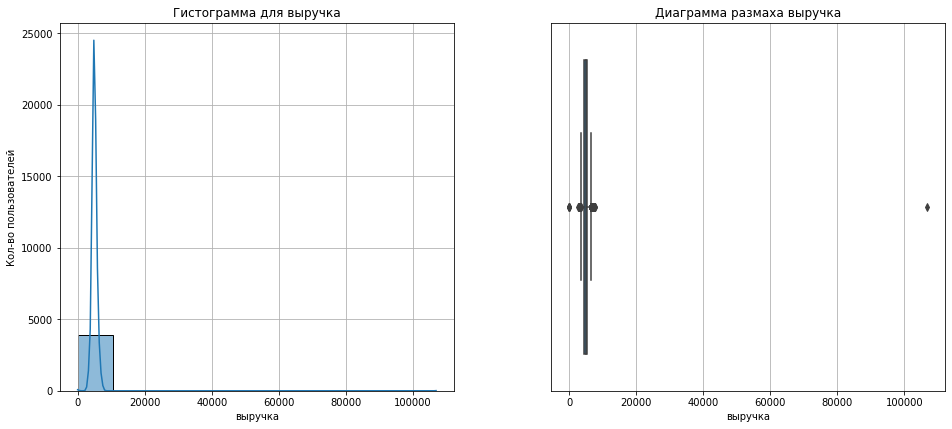

In [41]:
#Гистограммы и диаграммы размаха для колличественных признаков в m_money
cols=['выручка']
for col in cols:
    hist_box(m_money, col)

#### Категориальные признаки

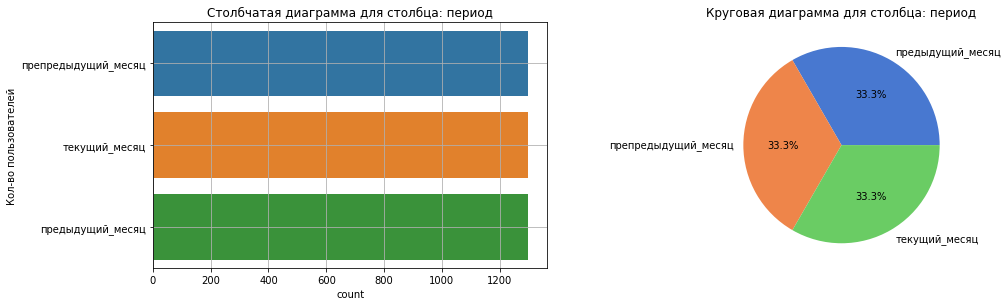

In [42]:
#Столбчатые и круговые диаграммы для категориальных данных из m_money
cols = ['период']
for col in cols:
    bar_pie(m_money, col, 'id')

#### **Вывод по m_money**

**Колличественные признаки**
1. выручка: данные распределены нормально.

**Категориальные признаки**
1. период: данные распрделены равномерно между каждым периодом.

### Анализ time

#### Колличественные признаки 

In [43]:
#Describe для time
cols=['минут']
time[cols].describe()

минут
count  2600.000000
mean     13.336154
std       4.080198
min       4.000000
25%      10.000000
50%      13.000000
75%      16.000000
max      23.000000

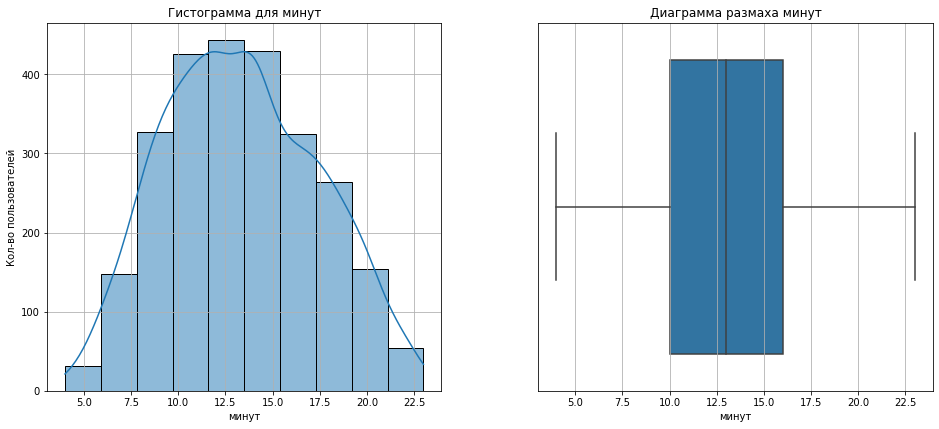

In [44]:
#Гистограммы и диаграммы размаха для колличественных признаков в time
cols=['минут']
for col in cols:
    hist_box(time, col)

#### Категориальные признаки

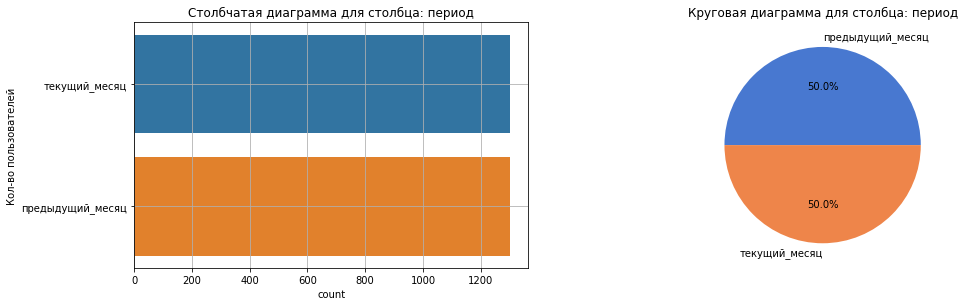

In [45]:
#Столбчатые и круговые диаграммы для категориальных данных из time
cols = ['период']
for col in cols:
    bar_pie(time, col, 'id')

#### **Вывод по time**

**Колличественные признаки**
1. минут: данные распределены нормально с медианой в 13 минутах.

**Категориальные признаки**
1. период: данные распределены равномерно между каждой категорией.

### Анадиз money

#### Колличественные признаки 

In [46]:
#Describe для money
cols=['прибыль']
money[cols].describe()

прибыль
count  1300.000000
mean      3.996631
std       1.013722
min       0.860000
25%       3.300000
50%       4.045000
75%       4.670000
max       7.430000

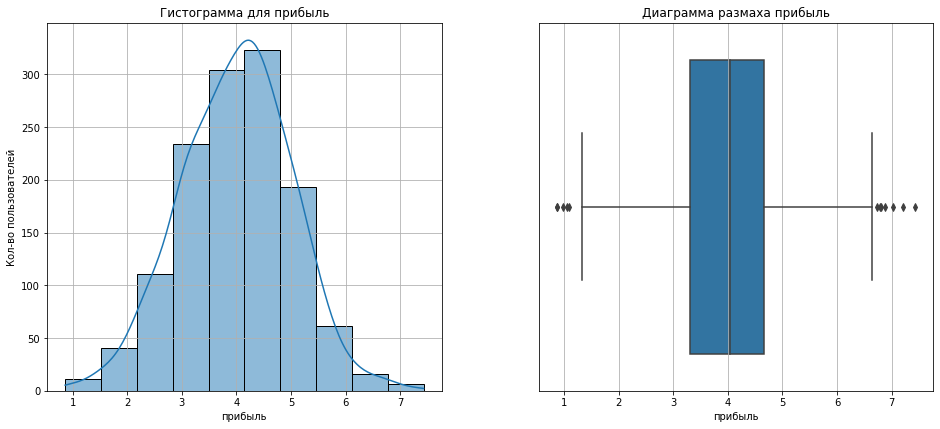

In [47]:
#Гистограммы и диаграммы размаха для колличественных признаков в money
cols=['прибыль']
for col in cols:
    hist_box(money, col)

#### **Вывод по money**

**Колличественные признаки**
1. прибыль: данные распределены нормально с медианой в 4.

### Выбор активных пользователей

In [48]:
#Нулевые значения выручки
m_money.query('выручка == 0')

id               период  выручка
0   215348  препредыдущий_месяц      0.0
2   215348     предыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0
34  215359     предыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0

In [49]:
#Список неактивных пользователей
inactive_users_id = m_money.query('выручка == 0')['id'].unique().tolist()
inactive_users_id

[215348, 215357, 215359]

In [50]:
#выбор активных покупателей

id_to_delete = inactive_users_id + too_big_income_id

market = market.query('id != @id_to_delete')
m_money = m_money.query('id != @id_to_delete')
time = time.query('id != @id_to_delete')
money = money.query('id != @id_to_delete')

market.reset_index(drop=True, inplace=True)
m_money.reset_index(drop=True, inplace=True)
time.reset_index(drop=True, inplace=True)
money.reset_index(drop=True, inplace=True)

print('Осталось строк в market:' ,market.shape[0])
print('Осталось строк в m_money:', m_money.shape[0])
print('Осталось строк в time:', time.shape[0])
print('Осталось строк в money:', money.shape[0])

Осталось строк в market: 1296
Осталось строк в m_money: 3888
Осталось строк в time: 2592
Осталось строк в money: 1296


### **Вывод**

1. Был проведен исследовательсеий анализ всех признаков во всех таблицах.
2. Были удалены пользователи с нулевой выручкой за препре- и предущие месяцы из всех таблиц, так же был удален пользователь со слишком большим значением выручки из всех таблиц.

Более подробные выводы по каждой из таблиц находятся выше.

## Объединение таблиц
<a id='section_4'></a>

In [51]:
# Сводная таблица для m_money
pivot_m_money = m_money.pivot_table(index='id', columns='период', aggfunc='sum')
pivot_m_money.columns = ['выручка_пред', 'выручка_препред', 'выручка_тек']
pivot_m_money.head()

выручка_пред  выручка_препред  выручка_тек
id                                                
215349        5216.0           4472.0       4971.6
215350        5457.5           4826.0       5058.4
215351        6158.0           4793.0       6610.4
215352        5807.5           4594.0       5872.5
215353        4738.5           5124.0       5388.5

In [52]:
# Сводная таблица для time
pivot_time = time.pivot_table(index='id', columns='период', aggfunc='sum')
pivot_time.columns = ['минут_пред', 'минут_тек']
pivot_time.head()

минут_пред  минут_тек
id                           
215349          12         10
215350           8         13
215351          11         13
215352           8         11
215353          10         10

In [53]:
# Соединение датафреймов
df_full = market.merge(pivot_m_money, on='id').merge(pivot_time, on='id')

In [54]:
# Превращения акционные покупки в категориальный признак
df_full['акционные_покупки'] = df_full['акционные_покупки'].apply(lambda x: 'часто' if x >= 0.5 else 'редко' )

In [55]:
# Преобразование целевого признака в бинарный (1 и 0)
df_full['покупательская_активность'] = df_full['покупательская_активность'].apply(lambda x: 1 if x == 'снизилась' else 0)

In [56]:
# Изменение индексации на id
df_full = df_full.set_index('id')

In [57]:
# Информация об итоговом датафрейме
df_full.info()
df_full.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   int64  
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   object 
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                 
215349                          1     премиум                 да   
215350                          1    стандарт                нет   
215351                          1    стандарт                 да   
215352                          1    стандарт                нет   
215353                          1    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

       акционные_покупки популярная_категория  \
id                                              
215349             часто              детское   
215350             редко         дом_текстиль   
215351             часто              детское   
215352             часто              детское   
215353             редко         дом_текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_пред  выручка_препред  выручка_тек  минут_пред  минут_тек  
id                                                                         
215349        5216.0           4472.0       4971.6          12         10  
215350        5457.5           4826.0       5058.4           8         13  
215351        6158.0           4793.0       6610.4          11         13  
215352        5807.5           4594.0       5872.5           8         11  
215353        4738.5           5124.0       5388.5          10         10

### **Вывод**

Для дальнейшей работы с данными было произведено объединение датафреймов market, m_money и time в один датафрейм под названием full_df. Данные из m_money и time были предварительно агреггированы (взята сумма) по каждому пользователю и периоду, после этой операции получили 3 столбца в m_money (выручка_пред - выручка от пользователя за предыдущий перирод, выручка_препред - выручка от пользователя за препредыдущий период, выручка_тек - выручка от пользователя за текущий период) и 2 в time (минут_пред - минут у пользователя за предыдущий период, минут_тек - минут у пользователя за текущий период).

На выходе получили full_df: 1296 записей, нет пропусков.

## Корреляционный анализ
<a id='section_5'></a>

In [58]:
# Расчет матрицы корреляции
interval_cols = ['маркет_актив_6_мес', 'длительность', 'выручка_пред',
                 'выручка_препред', 'выручка_тек', 'минут_пред', 'минут_тек']
phik_overview = df_full.phik_matrix(interval_cols=interval_cols)

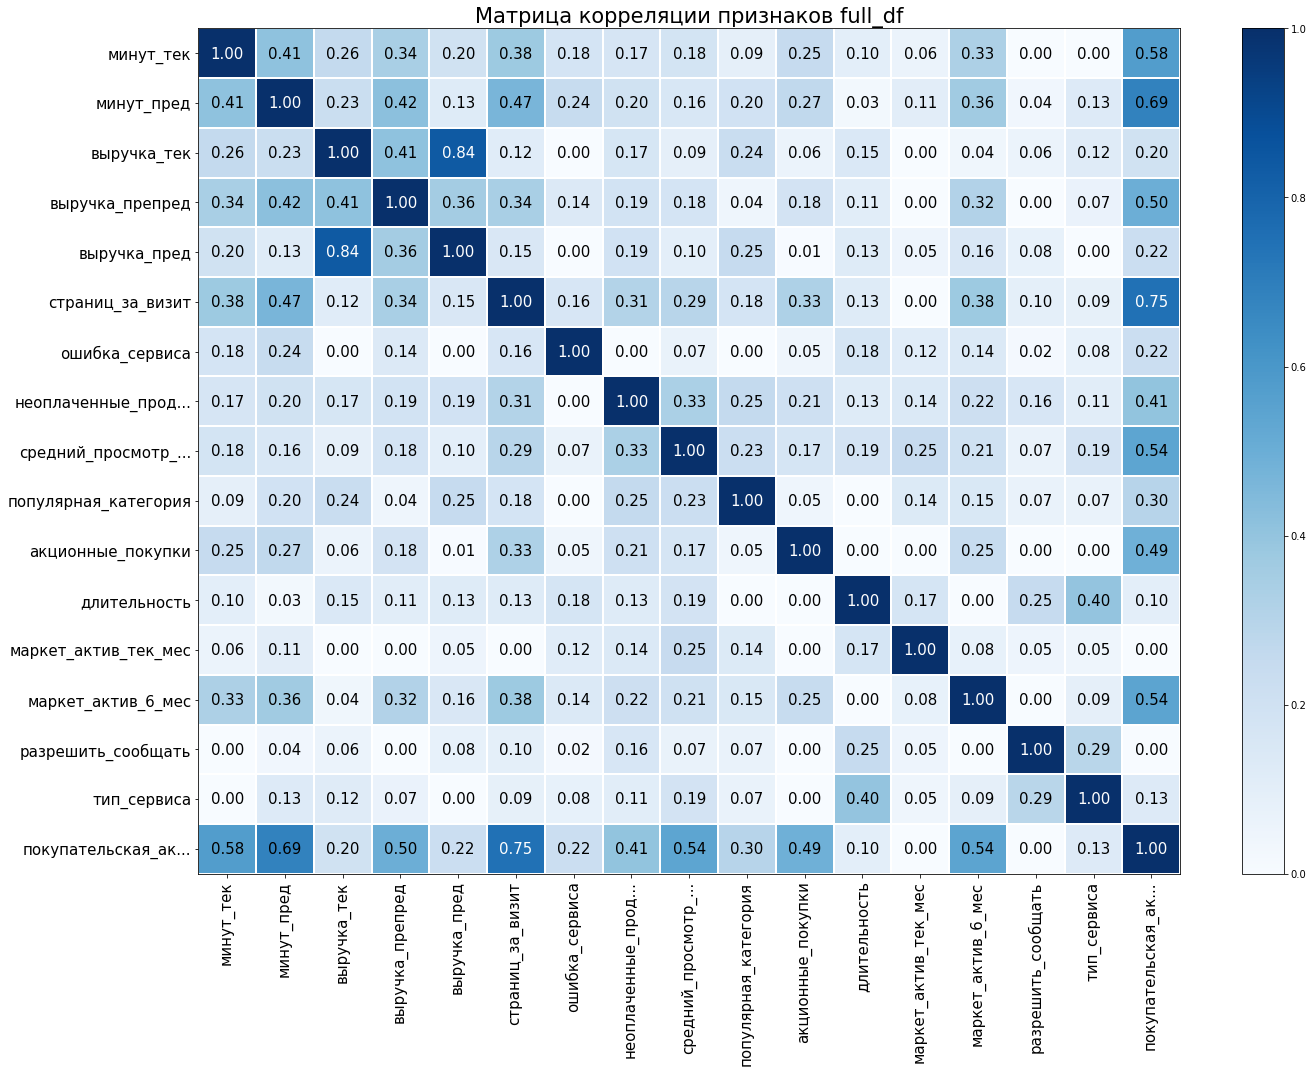

In [59]:
# Построение матрицы корреляции
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Blues',
    title='Мaтрица корреляции признаков full_df',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

### **Вывод**

Целевой признак - покупательская_активность имеет хорошую корреляцию с признаками: страниц_за_визит, минут_пред, минут_тек, средний_просмотр_категорий_за_визит, маркет_актив_6_мес, акционные_покупки, выручка_препред. Так же нет никакой корреляции с маркет_актив_тек_месяц и разрешить_сообщать, не будем удалять эти признаки, возможно есть какая-то нелинейная связь, в любом случае далее в проекте во время анализа важности признаков мы к этому вопросу вернемся.

Среди входных признаков есть только одна высокая корреляция - это выручка_пред и выручка_тек (0.84), удалять их не будем (взяли порог для мультколлинеарности равный 0.9).

## Использование пайплайнов
<a id='section_6'></a>

Для данной задачи подходит roc_auc_score т.к для нас важна в целом точность модели.

In [60]:
# Разделение данных на тренирорвочную и тестовую выборки
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    df_full.drop(
        ['покупательская_активность'], axis=1),
    df_full['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_full['покупательская_активность']
)

In [87]:
X_train.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        маркет_актив_тек_мес  длительность акционные_покупки  \
id                                                             
215858                     4           510             редко   
215361                     4           199             редко   
215884                     5           997             редко   
216564                     4           342             часто   
215715                     5           873             редко   

       популярная_категория  средний_просмотр_категорий_за_визит  \
id                                                                 
215858          электроника                                    2   
215361           тех_здоров                                    4   
215884          электроника                                    5   
216564                кухня                                    2   
215715              детское                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215858                                   4               7                16   
215361                                   5               2                 3   
215884                                   1               3                11   
216564                                   7               5                 8   
215715                                   2               2                 5   

        выручка_пред  выручка_препред  выручка_тек  минут_пред  минут_тек  
id                                                                         
215858        5170.5           4347.0       6014.2          20          6  
215361        6400.0           4597.0       3789.7          11         13  
215884        4113.0           4626.0       3798.4          13         10  
216564        4930.0           5269.0       4766.2          14         19  
215715        3716.0           4691.0       4600.0          10         10

In [88]:
X_test.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
216161    стандарт                 да                 4.1   
215654     премиум                нет                 1.4   
216307     премиум                 да                 3.3   
215501     премиум                 да                 3.5   
215934    стандарт                нет                 5.5   

        маркет_актив_тек_мес  длительность акционные_покупки  \
id                                                             
216161                     4           606             редко   
215654                     4           684             часто   
216307                     4           488             редко   
215501                     3          1057             редко   
215934                     4           147             часто   

       популярная_категория  средний_просмотр_категорий_за_визит  \
id                                                                 
216161           тех_здоров                                    6   
215654              детское                                    3   
216307         дом_текстиль                                    4   
215501         дом_текстиль                                    4   
215934          электроника                                    1   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
216161                                   1               4                12   
215654                                   6               1                 6   
216307                                   2               8                10   
215501                                   3               5                 6   
215934                                   2               3                 7   

        выручка_пред  выручка_препред  выручка_тек  минут_пред  минут_тек  
id                                                                         
216161        3973.0           4912.0       3289.2          16         17  
215654        3548.0           4656.0       4170.7          11          9  
216307        5444.0           4565.0       6335.8          20         11  
215501        6604.0           4993.0       6758.7           9          9  
215934        5090.0           4451.0       5773.8          15         18

In [91]:
y_train.head()

id
215858    0
215361    1
215884    0
216564    0
215715    1
Name: покупательская_активность, dtype: int64

In [90]:
y_test.head()

id
216161    0
215654    1
216307    0
215501    1
215934    1
Name: покупательская_активность, dtype: int64

In [65]:
# Столбцы для OneHotEncoder()
ohe_columns = [
    'разрешить_сообщать',
    'популярная_категория'
]

# Столбцы для OrdinalEncoder()
ord_columns = [
    'тип_сервиса',
    'акционные_покупки'
]

#Столбцы для масштабирования
num_columns = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит',
    'выручка_пред', 'выручка_препред', 'выручка_тек', 'минут_пред', 'минут_тек'
]

In [66]:
# Пайплайн OneHotEncoder()
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error')
        )
    ]
)

In [67]:
# Пайплайн OrdinalEncoder()
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                    ['редко', 'часто'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [68]:
# Пайплайн полной подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num',  StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [69]:
# Итоговый пайплайн
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
) 

In [70]:
# Словарь для перебора моделей и гиперпараметров к ним

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            penalty='l1',
            solver='liblinear'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [71]:
# Структура пайплайна
pipe_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),...
                                                  ['тип_сервиса',
                                                   'акционные_покупки']),
                                                 ('num', StandardScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'выручка_пред',
                                                   'выручка_препред',
                                                   'выручка_тек', 'минут_пред',
                                                   'минут_тек'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

In [72]:
# Рандомный поиск наиболее качетвенных моделей и параметров к ним
grid = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs = -1
)
search = grid.fit(X_train, y_train)

In [73]:
# Лучшая модель
model = search.best_estimator_
print('Лучшая модель:')

model['models']

Лучшая модель:


LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')

In [74]:
# Функция для расчета roc_auc для тренировочной и тестовой выборок
def cvs_roc_auc_train_test(model, X_test, y_test, search):

    roc_auc_on_train = search.best_score_
    roc_auc_on_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])                       
                                                   
    print(f'Метрика roc_auc для тренировочной выборки: {round(roc_auc_on_train, 3)}',
          f'Метрика roc_auc для тестовой выборки: {round(roc_auc_on_test, 3)}', sep='\n')

In [75]:
cvs_roc_auc_train_test(model, X_test, y_test, search)

Метрика roc_auc для тренировочной выборки: 0.896
Метрика roc_auc для тестовой выборки: 0.916


### **Вывод**

На данном этапе был создан пайплайн, который вмещает в себя этам предобработки данных и этап обучения модели.

1. На этапе предобработки сначала кодируются категориальные признаки с помощью OneHotEncoder, потом категориальные порядковые признаки с помощью OrdinalEncoder, затем происходит масштабирование колличественых данных с помощью StandrdScaler, MinMaxScaler или RobustScaler (происходит перебор).
2. На этапе обучения модели перебираются DecisionTreeClassifier, KNeighborsClassifier, SVC и LogisticRegression, так же в каждой модели перебираются некоторыет гиперпараметры.

В итоге была найдена и обучена модель для определения снижения активности пользователей. Лучшей по метрике roc_auc оказалась LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')) с масштабированием данных с помощью RobustScaler().

- Метрика roc_auc лучшей модели для тренировочной выборки: 0.896.

- Метрика roc_auc лучшей модели для тестовой выборки: 0.916.

Метрики на тренировочной и тестовой выборках почти равны друг другу, значит модель не недообучена и не переобучена.

## Анализ важности признаков
<a id='section_7'></a>

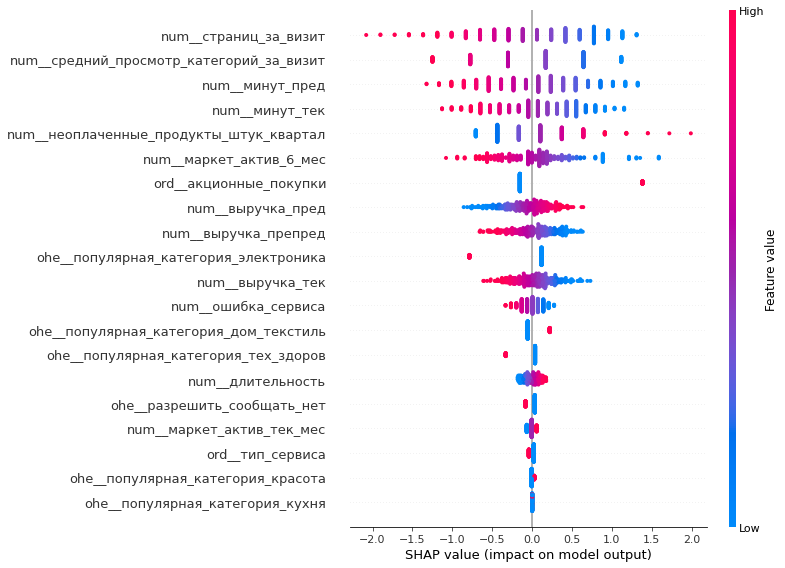

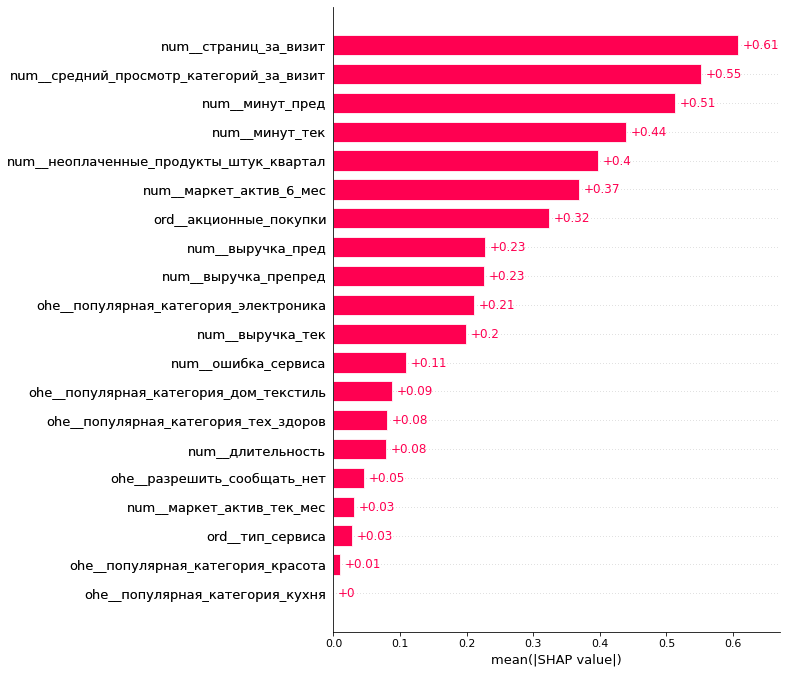

In [76]:
# Предобработанные входные данные
X_train_preprocessed = model['preprocessor'].fit_transform(X_train)
X_test_preprocessed = model['preprocessor'].transform(X_test)

# Создание Explainer
explaner = shap.LinearExplainer(model['models'], X_train_preprocessed)

# Добавление названий столбцов, для более понятных графиков
feature_names = model['preprocessor'].get_feature_names_out()
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)

# Нахождение значений Шэпли
shap_values = explaner(X_test_preprocessed)

#Построение графиков
shap.plots.beeswarm(shap_values, max_display=30)
shap.plots.bar(shap_values, max_display=30)

### **Вывод**

1. Самыми важными признаками являются: страниц_за_визит, средний просмотр_категорий_за_визит, минут_пред, минут_тек, неоплаченные_продукты_штук_квартал.
    
По сути,самое важное для пользовательской активности, чтобы челевек как можно больше просматривал страницы товаров и соответсвенно за счет всего этого проводил больше времени на платформе.

Интересная ситуция с неоплаченные_продукты_штук_квартал, Если в корзине много неоплаченых товаров, то этот будет сильно влиять на отнесение пользователя в группу со сниженной пользовательской активностью.

2. Наименее значимыми признаками являются все популярные категории (кроме бытовой техники и электроники), тип_сервиса, разрешить_сообщать, маркет_актив_тек_мес, ошибка_сервиса, длительность.

Все эти не сильно значимые признаки показывают нам, что нет особого значения какая категория товаров нравится человеку (за малым исключение в виде бытовой техники и электроники), нет особого значения какой тип сервиса или сколько у человека было маркетинговых коммуникаций. 

Интересная ситуация получается с бытовой техникой и электроникой, если человеку нравится эта категория, то он с меньшей вероятностью потеряет пользовательсую активность.

3. Рекомендации и идеи:
    - Самое важное для нас это кол-во просмотренных страниц, значит нам нужно уметь как можно лучше опряделять что человеку нравится и подсовывать ему именно эти страницы, на которые он с большей вероятностью перейдет (а вот и RecSys :D).
    - При построении моделей можно поиграться с входными признакакми, попробовать избавится от всех категорий товаров (это может и негативно сказаться из-за бытовой техники и элетроники, надо смотреть), тип_сервиса, маркет_актив_тек_месяц, разрешить_сообщать.

## Сегментация покупателей
<a id='section_8'></a>

### Сегментация

Для начала добавим предсказания модели в df_full и данные о прибыли из таблицы money.

In [77]:
# Создание полного датафрейма с предсказаниями модели
X_train_predict = X_train.copy()
X_train_predict['вероятность_снижения_акт']= model.predict_proba(X_train)[:,1]

X_test_predict = X_test.copy()
X_test_predict['вероятность_снижения_акт']= model.predict_proba(X_test)[:,1]

df_full_predict = pd.concat([X_train_predict, X_test_predict])
df_full_predict.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        маркет_актив_тек_мес  длительность акционные_покупки  \
id                                                             
215858                     4           510             редко   
215361                     4           199             редко   
215884                     5           997             редко   
216564                     4           342             часто   
215715                     5           873             редко   

       популярная_категория  средний_просмотр_категорий_за_визит  \
id                                                                 
215858          электроника                                    2   
215361           тех_здоров                                    4   
215884          электроника                                    5   
216564                кухня                                    2   
215715              детское                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215858                                   4               7                16   
215361                                   5               2                 3   
215884                                   1               3                11   
216564                                   7               5                 8   
215715                                   2               2                 5   

        выручка_пред  выручка_препред  выручка_тек  минут_пред  минут_тек  \
id                                                                          
215858        5170.5           4347.0       6014.2          20          6   
215361        6400.0           4597.0       3789.7          11         13   
215884        4113.0           4626.0       3798.4          13         10   
216564        4930.0           5269.0       4766.2          14         19   
215715        3716.0           4691.0       4600.0          10         10   

        вероятность_снижения_акт  
id                                
215858                  0.060010  
215361                  0.794062  
215884                  0.083575  
216564                  0.689927  
215715                  0.747659

In [78]:
# Добавление в итоговый датафрейм столбца с прибылью
df_full_predict = df_full_predict.merge(money.set_index('id'), on='id')
df_full_predict.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        маркет_актив_тек_мес  длительность акционные_покупки  \
id                                                             
215858                     4           510             редко   
215361                     4           199             редко   
215884                     5           997             редко   
216564                     4           342             часто   
215715                     5           873             редко   

       популярная_категория  средний_просмотр_категорий_за_визит  \
id                                                                 
215858          электроника                                    2   
215361           тех_здоров                                    4   
215884          электроника                                    5   
216564                кухня                                    2   
215715              детское                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215858                                   4               7                16   
215361                                   5               2                 3   
215884                                   1               3                11   
216564                                   7               5                 8   
215715                                   2               2                 5   

        выручка_пред  выручка_препред  выручка_тек  минут_пред  минут_тек  \
id                                                                          
215858        5170.5           4347.0       6014.2          20          6   
215361        6400.0           4597.0       3789.7          11         13   
215884        4113.0           4626.0       3798.4          13         10   
216564        4930.0           5269.0       4766.2          14         19   
215715        3716.0           4691.0       4600.0          10         10   

        вероятность_снижения_акт  прибыль  
id                                         
215858                  0.060010     4.37  
215361                  0.794062     4.03  
215884                  0.083575     4.37  
216564                  0.689927     5.58  
215715                  0.747659     4.87

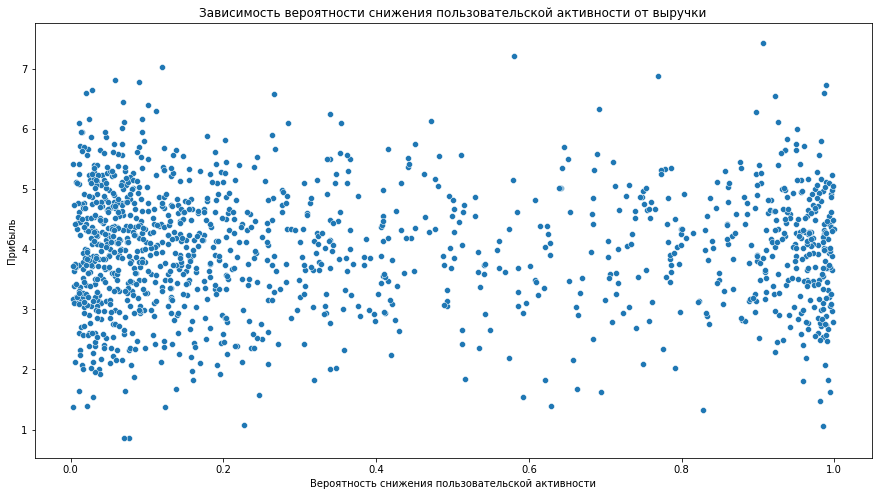

In [79]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_full_predict, y='прибыль', x='вероятность_снижения_акт')
plt.xlabel('Вероятность снижения пользовательской активности')
plt.ylabel('Прибыль')
plt.title('Зависимость вероятности снижения пользовательской активности от выручки')
plt.show()

In [80]:
# Функция дял построения поля корреляции 
def create_scatterplot(hue):
        plt.figure(figsize=(15,8))
        sns.scatterplot(data=df_full_predict, x = 'вероятность_снижения_акт', y = 'прибыль', hue=hue)
        plt.xlabel('Вероятность снижения активности')
        plt.ylabel('Прибыль')
        plt.title(f'Зависимость вероятности снижения активности от выручки с делением на {hue}')
        plt.show()

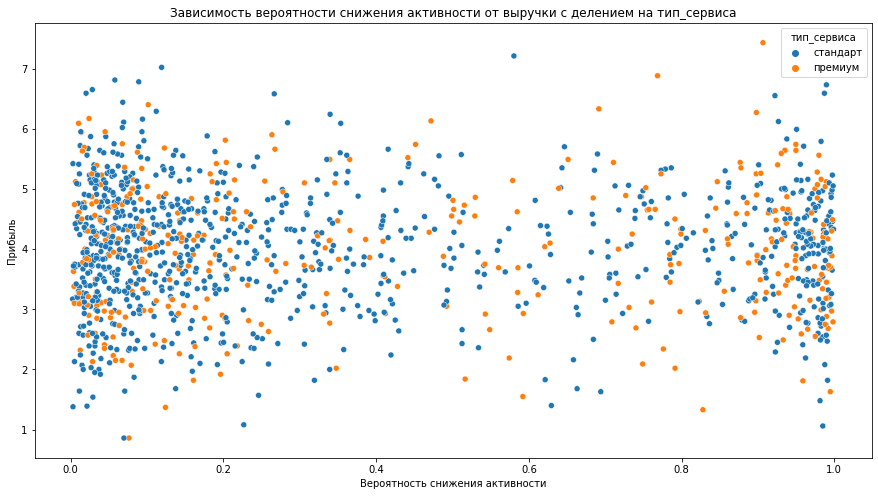

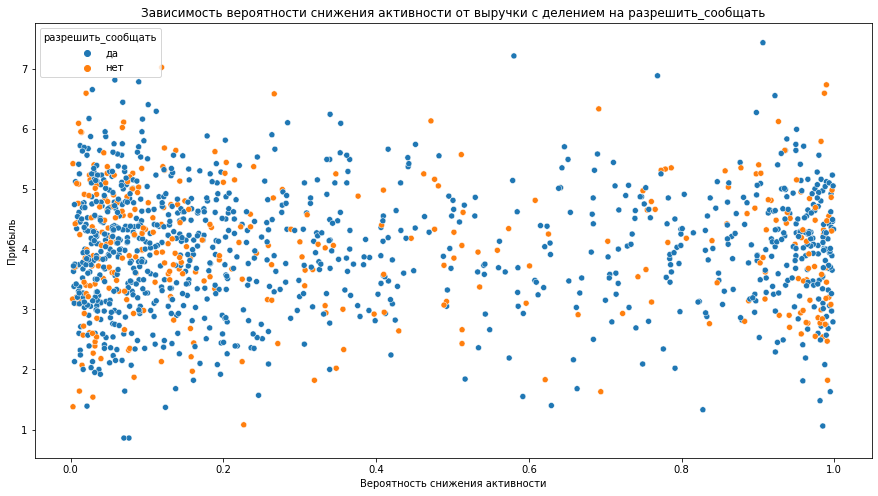

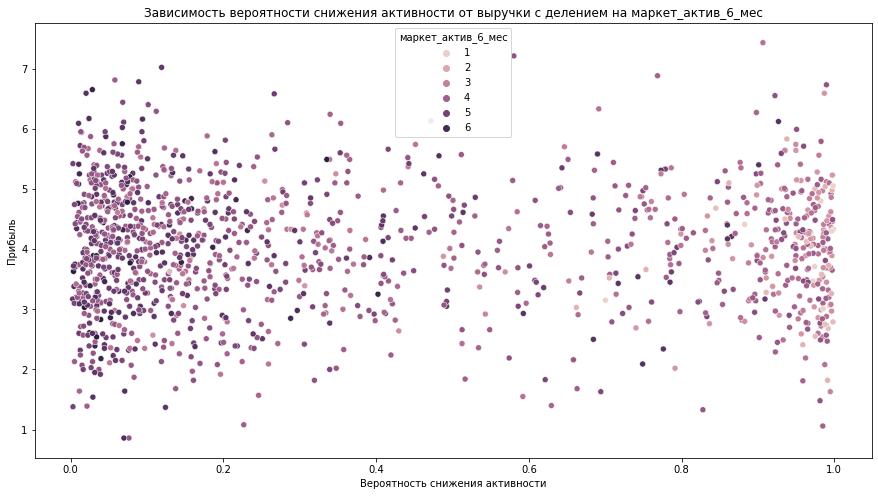

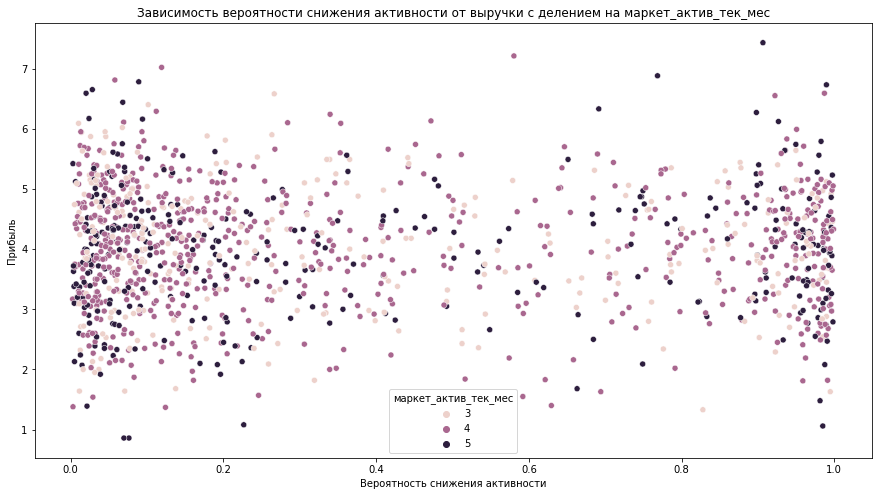

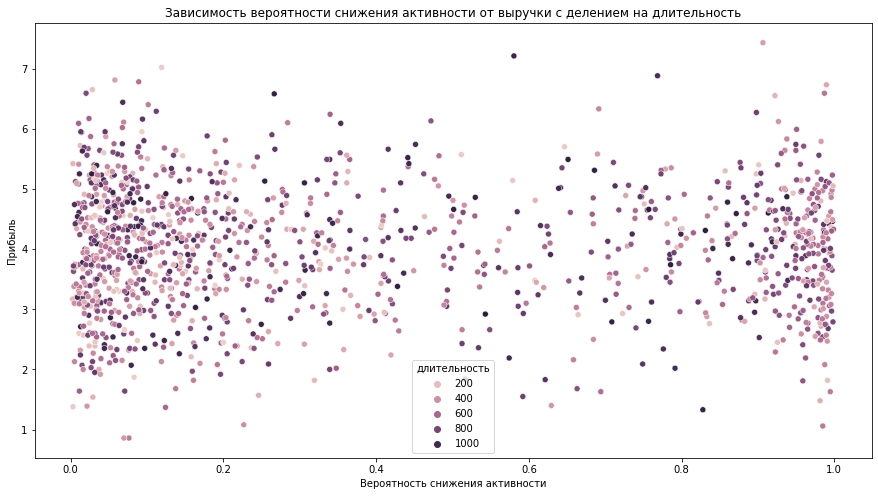

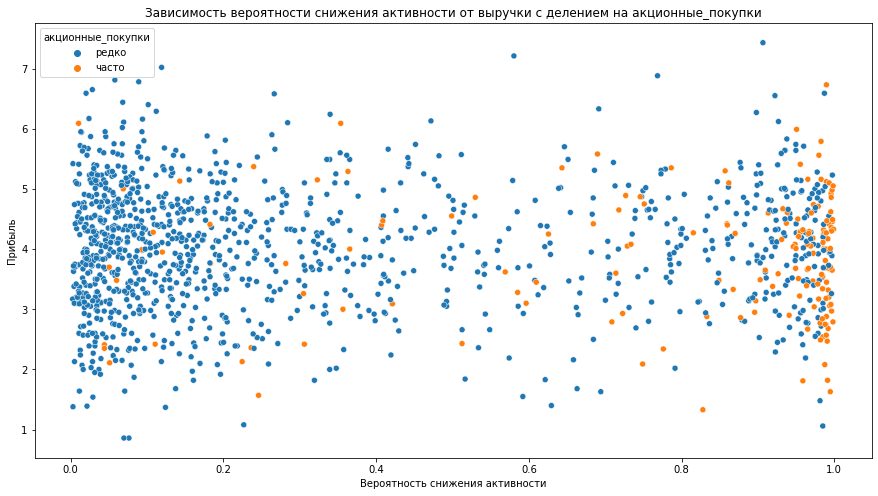

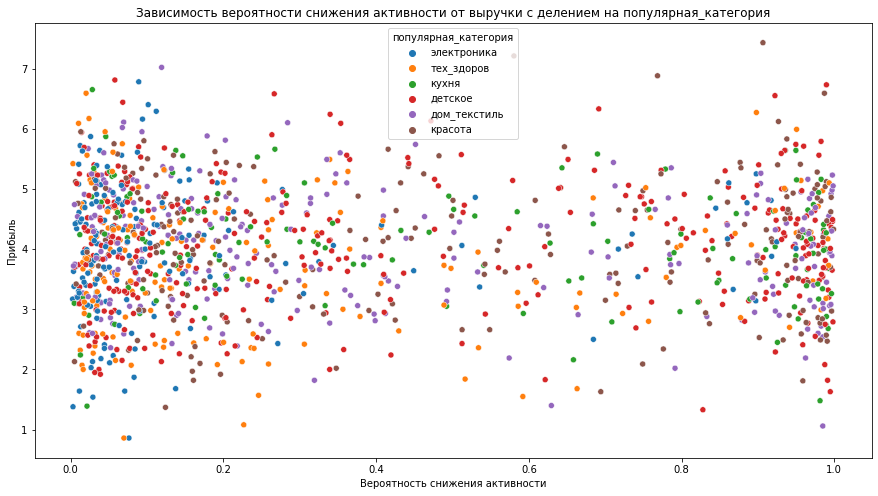

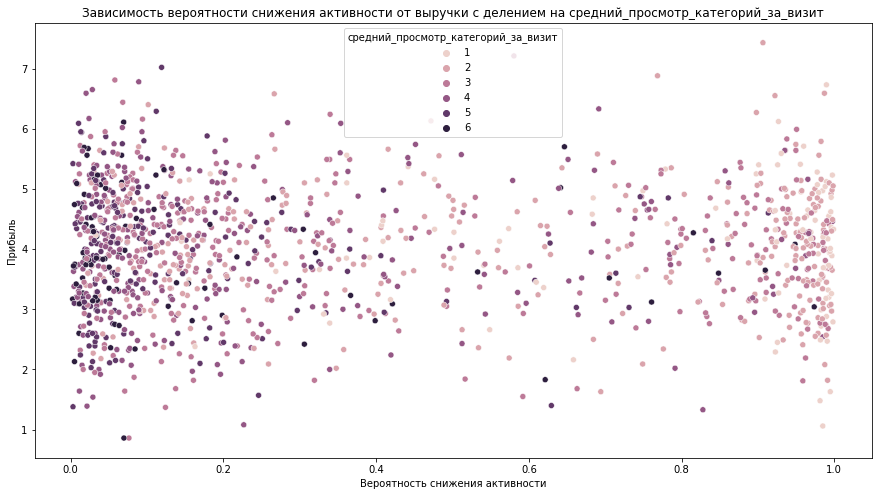

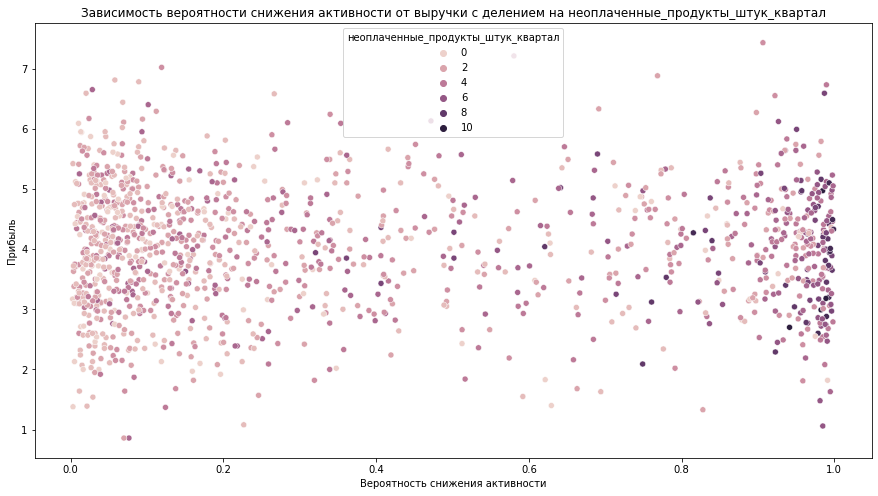

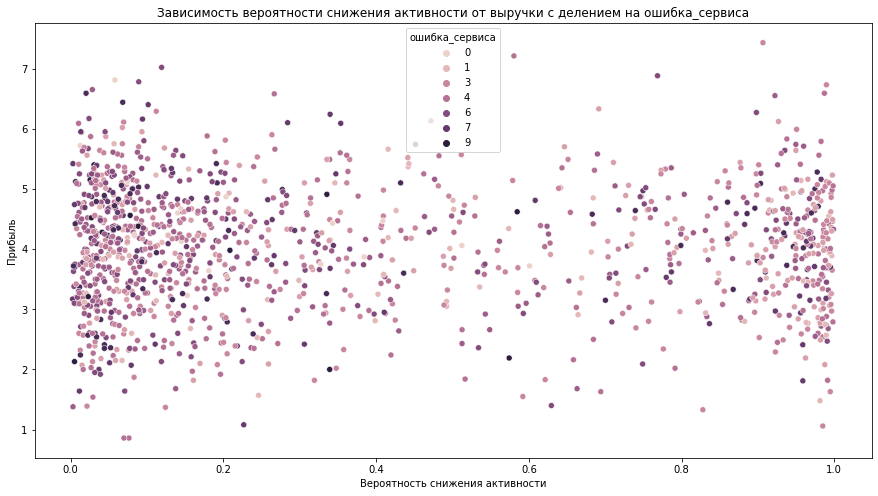

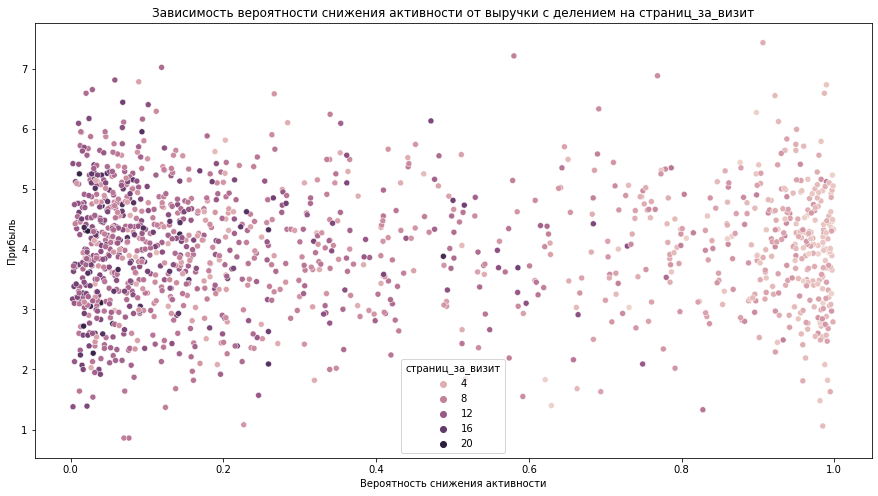

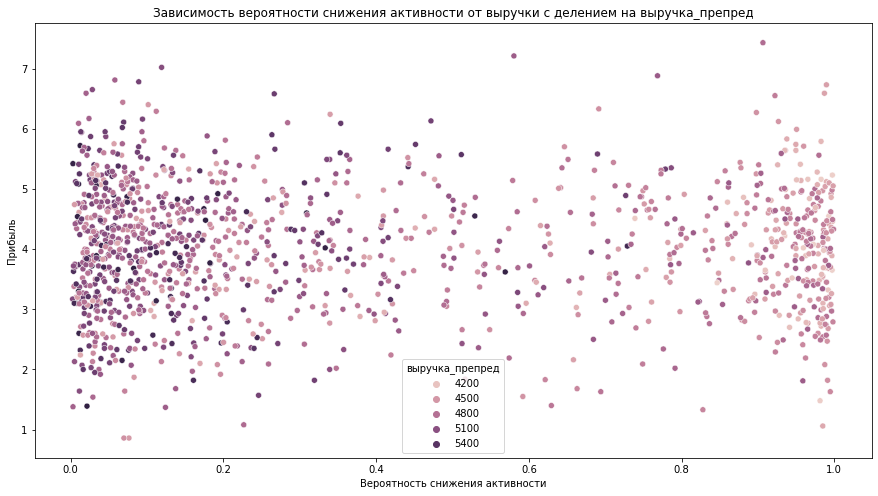

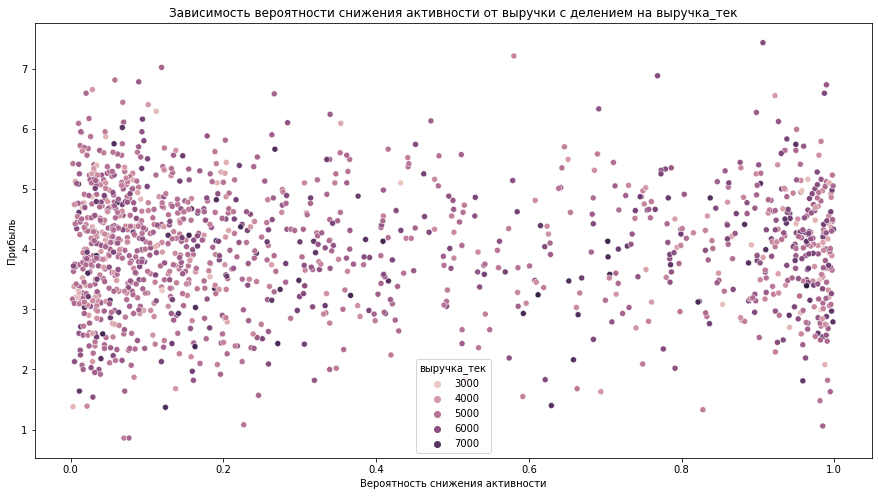

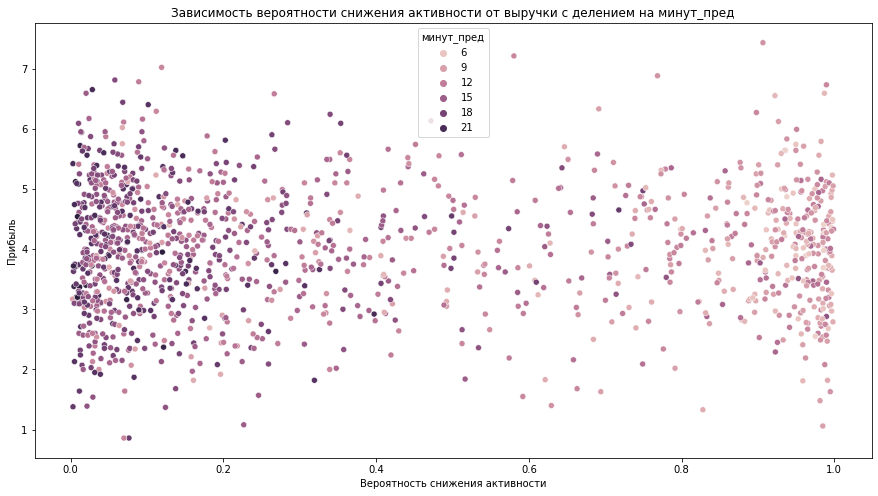

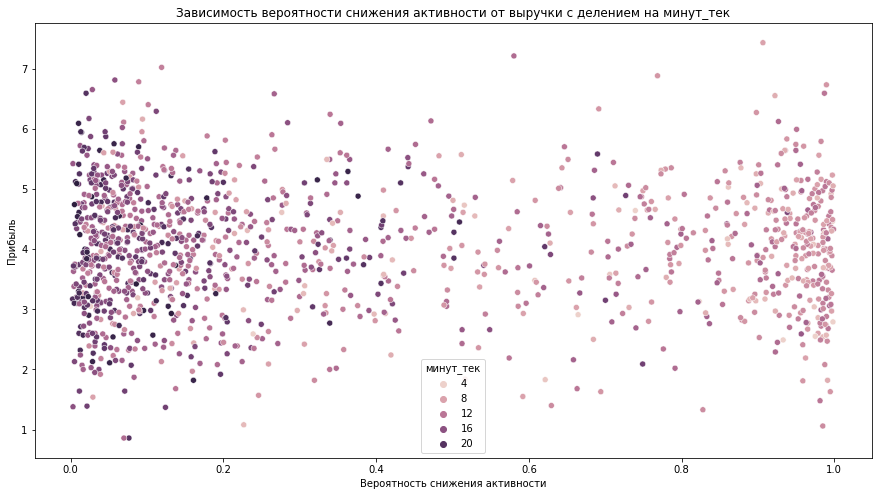

In [81]:
# Построение полей корреляции для разных признаков
cols = [
    'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
    'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 
    'ошибка_сервиса', 'страниц_за_визит', 'выручка_препред','выручка_тек','минут_пред','минут_тек'
]

for col in cols:
    create_scatterplot(col)

Мы построили поля корреляции вероятности снижения пользовательской активности и прибыли по всем признакам. И мы видим несколько вариантов сегментации:

1. По акционные_покупки - есть явная категория людей которые покупают товары только во время акций, и у этих людей чаще высокая вероятность снижения пользовательской активности.
2. По средний_просмотр_категорий_за_визит - люди с маленьким кол-вом просмотренных категорий часто имеют низкую пользовательскую активность.
3. По неоплаченные_продукты_штук_квартал - люди с высоким кол-вом неоплаченных товаром чаще имеют низкую пользовательскую активность.
4. По страниц_за_визит - чем меньше человек смотрит страниц, тем меньше у него пользовательская активность.

2ой, 3ий и 4ый пункты примерно об одном и том же, чем меньше человек взаимодействует с платформой, тем меньше у него пользовательская активность. Этот кейс уже обсуждался в выводе после Анадиза важности признаков, а вот 1ый пункт не выглядит на столько очевидным, поэтому именно его мы и будем исследовать, а именно людей с высокой активностью во время акций, которых модель с высокой вероятностью определяет в категорию с пониженой пользовательской активностью. Исследуемая нами категория составляет чуть меньше 10% пользователей.

In [82]:
# Создание столбца-маркера сегмента для дальнейшей работы
df_full_predict['сегмент'] = df_full_predict.apply(lambda row: 
                                                   'целевой' if row['вероятность_снижения_акт'] > 0.8 and
                                                   row['акционные_покупки'] == 'часто' else 'остальные', axis=1)
df_full_predict.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
215858    стандарт                 да                 5.5   
215361    стандарт                 да                 5.1   
215884    стандарт                 да                 4.3   
216564    стандарт                 да                 5.6   
215715     премиум                 да                 3.6   

        маркет_актив_тек_мес  длительность акционные_покупки  \
id                                                             
215858                     4           510             редко   
215361                     4           199             редко   
215884                     5           997             редко   
216564                     4           342             часто   
215715                     5           873             редко   

       популярная_категория  средний_просмотр_категорий_за_визит  \
id                                                                 
215858          электроника                                    2   
215361           тех_здоров                                    4   
215884          электроника                                    5   
216564                кухня                                    2   
215715              детское                                    3   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215858                                   4               7                16   
215361                                   5               2                 3   
215884                                   1               3                11   
216564                                   7               5                 8   
215715                                   2               2                 5   

        выручка_пред  выручка_препред  выручка_тек  минут_пред  минут_тек  \
id                                                                          
215858        5170.5           4347.0       6014.2          20          6   
215361        6400.0           4597.0       3789.7          11         13   
215884        4113.0           4626.0       3798.4          13         10   
216564        4930.0           5269.0       4766.2          14         19   
215715        3716.0           4691.0       4600.0          10         10   

        вероятность_снижения_акт  прибыль    сегмент  
id                                                    
215858                  0.060010     4.37  остальные  
215361                  0.794062     4.03  остальные  
215884                  0.083575     4.37  остальные  
216564                  0.689927     5.58  остальные  
215715                  0.747659     4.87  остальные

### Анализ сегмента

In [83]:
# Функция для постороения круговый диаграмм для категориальных данных
def create_segments_pies(df, col, values):
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout(h_pad=1)
    fig.set_figheight(4)
    fig.set_figwidth(14)
    
    segment = df[df['сегмент'] == 'целевой']
    other = df[df['сегмент'] == 'остальные']
    
    piv_segment = pd.pivot_table(segment, index=col, values=values, aggfunc='count')
    piv_other = pd.pivot_table(other, index=col, values=values, aggfunc='count')
    
    piv_segment.plot(y=values, kind='pie', ax=ax[0], autopct='%1.1f%%', colors=sns.color_palette('muted'))
    piv_other.plot(y=values, kind='pie', ax=ax[1], autopct='%1.1f%%', colors=sns.color_palette('muted'))
    
    ax[0].yaxis.set_visible(False)
    ax[1].yaxis.set_visible(False)
    
    ax[0].get_legend().remove()
    ax[1].get_legend().remove()
    
    ax[0].set_title(f'Круговая диаграмма исследуемого сегмента для столбца\n{col}')
    ax[1].set_title(f'Круговая диаграмма остальных пользователей для столбца\n{col}')

In [84]:
# Функция выводящая гистограмму для колличественных признаков
def create_segments_hist(df, col, target):
    
    fig = plt.figure(figsize=(8,6))
    
    sns.histplot(df, x=col, bins=10, kde=True, hue=target)
    
    plt.title(f'Сегментированная гистограмма для {col}')
    
    plt.ylabel('Кол-во пользователей')

    plt.show()

#### Категориальные признаки

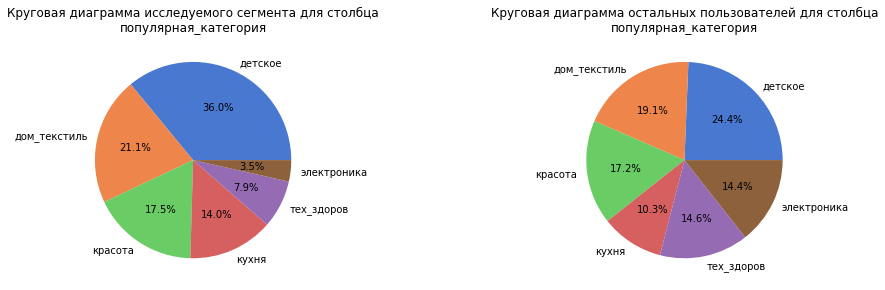

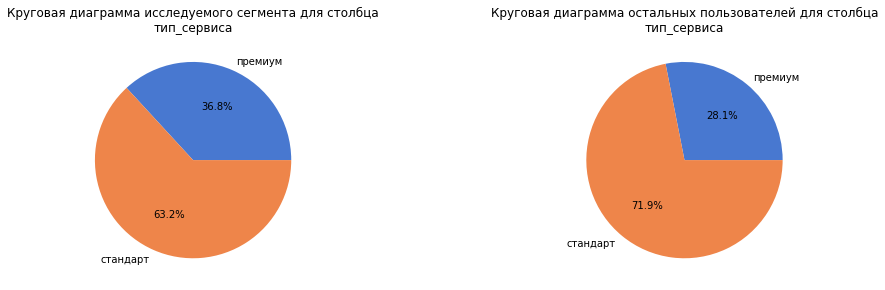

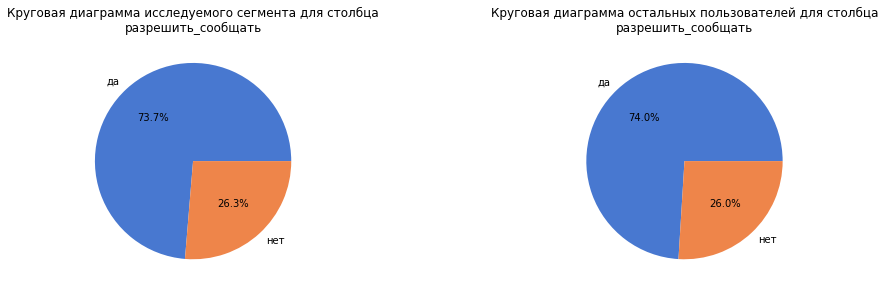

In [85]:
# Исследование категориальных данных целевой группы пользователей
categotical_features=['популярная_категория', 'тип_сервиса', 'разрешить_сообщать']

for col in categotical_features:
    create_segments_pies(df_full_predict, col, 'акционные_покупки')

**Вывод по категориальным признакам**

- У нашего целевого сегмента пользователей значительно более популярная категория товаров - это деткое, жаль мы не можем узнать возраст и пол пользователей, однако можно предположить, что в их числе достаточно много женщин с детьми.
- У целевого сегмента тип_сервиса - премиум немного популярней, чем у остальных пользоватлей, неожиданно.

#### Колличественные признаки

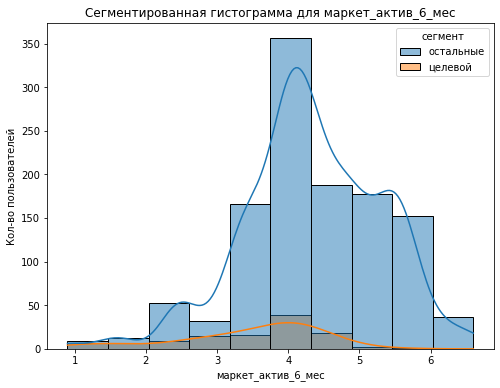

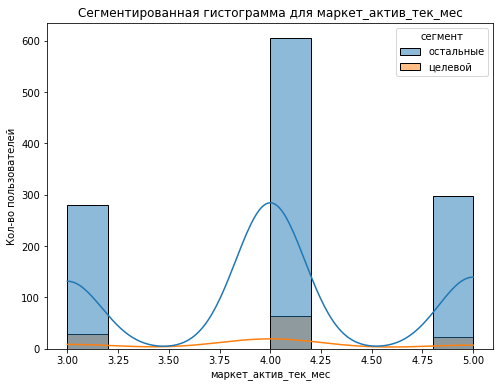

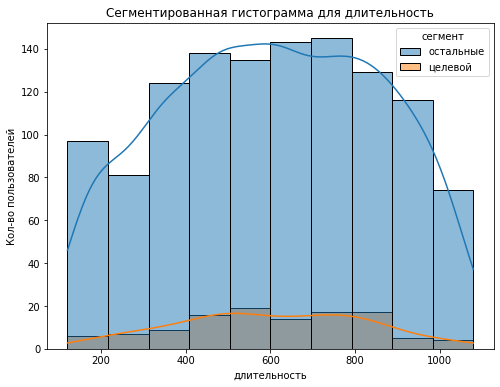

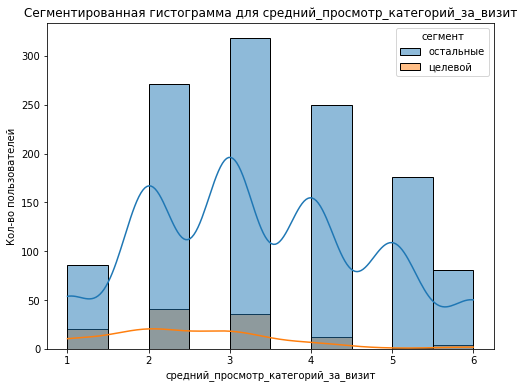

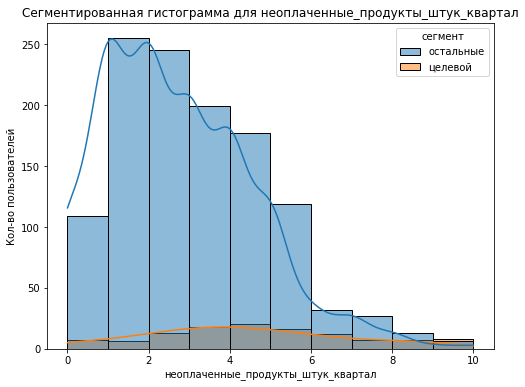

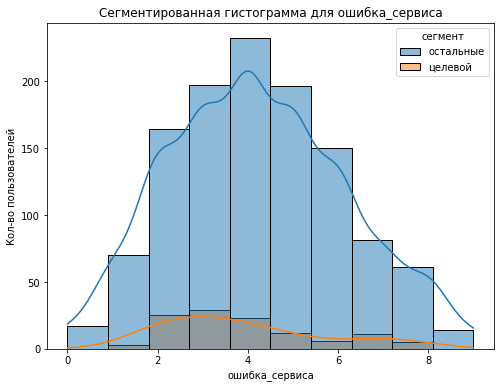

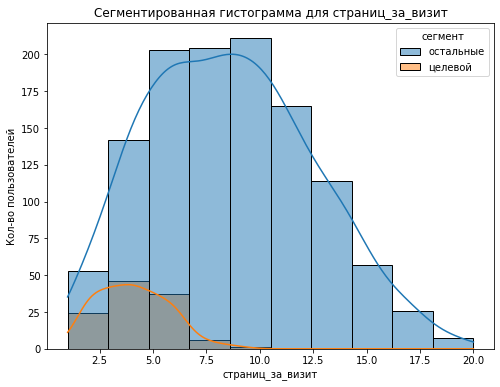

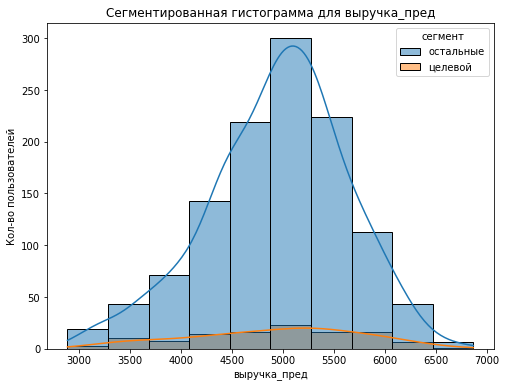

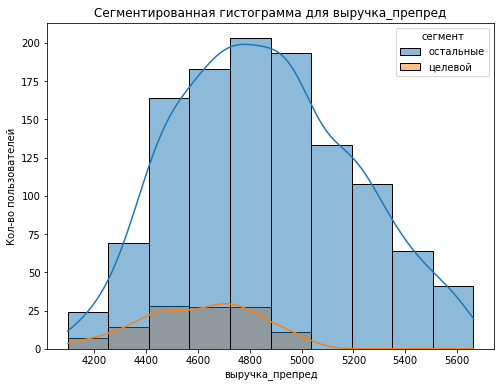

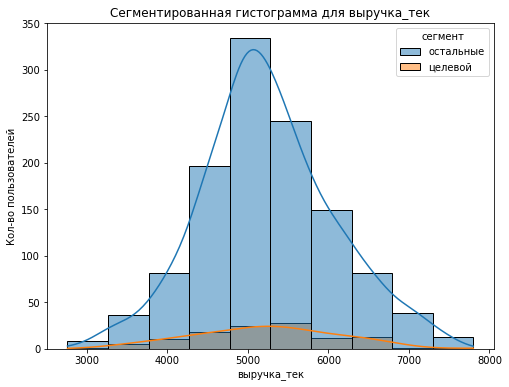

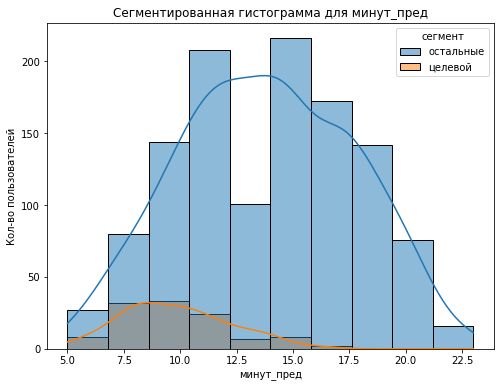

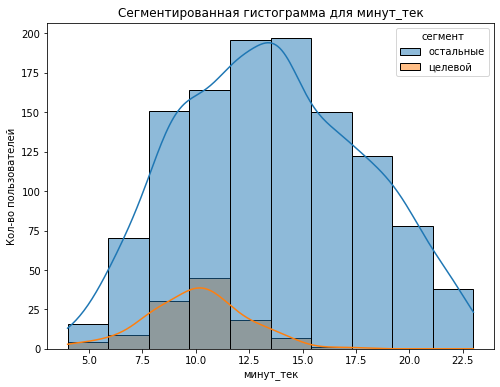

In [86]:
# Исследование колличественных данных целевой группы пользователей
quantitive_features=[
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
    'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса', 'страниц_за_визит', 'выручка_пред', 'выручка_препред', 'выручка_тек',
    'минут_пред', 'минут_тек'
]

for col in quantitive_features:
    create_segments_hist(df_full_predict, col, 'сегмент')

**Вывод по категориальным признакам**

- Пользователи из целевого сегмента обычно меньше проводят времени на платформе и меньшу посещают страниц товаров.
- Компания обычно получает чуть меньше выручки от таких пользователей.
- В корзине у пользователей из целевого сегмента обычно больше неоплаченных товаров, чем у остальных пользователей.

### **Вывод**

**Портрет исследуемого пользователя**

Наш пользователь любит товары для детей, домашний текстиль и товары для красоты, эти категории говорят о том, что здесь много женщин, еще и очень вероятно, что с детьми. Больше любит иметь подписку, чем остальные пользователи. Не любит долго сидеть на платформе, не любит просматривать кучу товаров и любит оставлять товары неоплаченными в корзине.

**Рекомендации о работе с данной категорией пользователей**

Наша основная задача давать такому пользователю всю информацию о товарах как можно быстрее, не тратя его аремя. Для этого нужно сосредоточится на главной странице платформы, чтобы все товары, которые могут понравится данному пользователю были сразу у него перед глазами (и снова RecSys :D), также чтобы информацию о скидках он тоже узнавал сразу на этой главной странице. 
Еще можно поэксперементрировать с уведомлениями или рассылками о неоплаченных товарах в корзине, учитывая портрет пользователя, не исключены те случаи, когда пользователь забывает о товарах в корзине (P.S. Я не сексист) ), однако это вопрос спорный, тут нужно эксперементировать и смотреть конверсию от таких решений.

## Общий вывод
<a id='section_9'></a>

**Загрузка данных**

1. Загрузили данные из 4х датафреймов.
2. Привели названия столбцов к snake_case.

Типы данных:
1. **market** (1300 записи)
    - Категориальные: id, покупательская_активность, тип_сервиса, разрешить_сообщать, популярная_категория.
    - Колличественные: маркет_актив_6_мес, маркет_актив_тек_мес, длительность, акционные_покупки, средний_просмотр_категорий_за_визит, неоплаченные_продукты_штук_квартал, ошибка_сервиса, страниц_за_визит.
2. **m_money** (3900 записей)
    - Категориальные: id, период.
    - Колличественные: выручка.
3. **time** (2600 записей)
    - Категориальные: id, период. 
    - Колличественные: минут.
4. **money** (1300 записей)
    - Категориальные: id. 
    - Колличественные: прибыль.
    
Пропуски отсутствуют.

**Предобработка данных**

1. Были устранены ненявные дубликаты и орфографические ошибки в категориальных признаках.
2. Категориальные признаки были приведены к snake_case для более удобной работы с ними в будущем.
3. Быдо устранено 5 явных дубликатов в датафрейме m_money (осталось 3895 записей).

**Исследовательский анализ данных**

1. Был проведен исследовательсеий анализ всех признаков во всех таблицах.
2. Были удалены пользователи с нулевой выручкой за препре- и предущие месяцы из всех таблиц, так же был удален пользователь со слишком большим значением выручки из всех таблиц.

Более подробные выводы по каждой из таблиц находятся выше.

**Объединение таблиц**

Для дальнейшей работы с данными было произведено объединение датафреймов market, m_money и time в один датафрейм под названием full_df. Данные из m_money и time были предварительно агреггированы (взята сумма) по каждому пользователю и периоду, после этой операции получили 3 столбца в m_money (выручка_пред - выручка от пользователя за предыдущий перирод, выручка_препред - выручка от пользователя за препредыдущий период, выручка_тек - выручка от пользователя за текущий период) и 2 в time (минут_пред - минут у пользователя за предыдущий период, минут_тек - минут у пользователя за текущий период).

На выходе получили full_df: 1296 записей, нет пропусков.

**Корреляционный анализ**

Целевой признак - покупательская_активность имеет хорошую корреляцию с признаками: страниц_за_визит, минут_пред, минут_тек, средний_просмотр_категорий_за_визит, маркет_актив_6_мес, акционные_покупки, выручка_препред. Так же нет никакой корреляции с маркет_актив_тек_месяц и разрешить_сообщать, не будем удалять эти признаки, возможно есть какая-то нелинейная связь, в любом случае далее в проекте во время анализа важности признаков мы к этому вопросу вернемся.

Среди входных признаков есть только одна высокая корреляция - это выручка_пред и выручка_тек (0.84), удалять их не будем (взяли порог для мультколлинеарности равный 0.9).

**Использование пайплайнов**

На данном этапе был создан пайплайн, который вмещает в себя этам предобработки данных и этап обучения модели.

1. На этапе предобработки сначала кодируются категориальные признаки с помощью OneHotEncoder, потом категориальные порядковые признаки с помощью OrdinalEncoder, затем происходит масштабирование колличественых данных с помощью StandrdScaler, MinMaxScaler или RobustScaler (происходит перебор).
2. На этапе обучения модели перебираются DecisionTreeClassifier, KNeighborsClassifier, SVC и LogisticRegression, так же в каждой модели перебираются некоторыет гиперпараметры.

В итоге была найдена и обучена модель для определения снижения активности пользователей. Лучшей по метрике roc_auc оказалась LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')) с масштабированием данных с помощью RobustScaler().

- Метрика roc_auc лучшей модели для тренировочной выборки: 0.896.

- Метрика roc_auc лучшей модели для тестовой выборки: 0.916.

Метрики на тренировочной и тестовой выборках почти равны друг другу, значит модель не недообучена и не переобучена.

**Анализ важности признаков**

1. Самыми важными признаками являются: страниц_за_визит, средний просмотр_категорий_за_визит, минут_пред, минут_тек, неоплаченные_продукты_штук_квартал.
    
По сути,самое важное для пользовательской активности, чтобы челевек как можно больше просматривал страницы товаров и соответсвенно за счет всего этого проводил больше времени на платформе.

Интересная ситуция с неоплаченные_продукты_штук_квартал, Если в корзине много неоплаченых товаров, то этот будет сильно влиять на отнесение пользователя в группу со сниженной пользовательской активностью.

2. Наименее значимыми признаками являются все популярные категории (кроме бытовой техники и электроники), тип_сервиса, разрешить_сообщать, маркет_актив_тек_мес, ошибка_сервиса, длительность.

Все эти не сильно значимые признаки показывают нам, что нет особого значения какая категория товаров нравится человеку (за малым исключение в виде бытовой техники и электроники), нет особого значения какой тип сервиса или сколько у человека было маркетинговых коммуникаций. 

Интересная ситуация получается с бытовой техникой и электроникой, если человеку нравится эта категория, то он с меньшей вероятностью потеряет пользовательсую активность.

3. Рекомендации и идеи:
    - Самое важное для нас это кол-во просмотренных страниц, значит нам нужно уметь как можно лучше опряделять что человеку нравится и подсовывать ему именно эти страницы, на которые он с большей вероятностью перейдет (а вот и RecSys :D).
    - При построении моделей можно поиграться с входными признакакми, попробовать избавится от всех категорий товаров (это может и негативно сказаться из-за бытовой техники и элетроники, надо смотреть), тип_сервиса, маркет_актив_тек_месяц, разрешить_сообщать.

**Сегментация покупателей**

Мы исследовали пользователей, которые часто покупают товары по акциям и которых модель с высокой вероятностью определяет в группу пользователей, у которых снизится пользовательская активность. Это примерно 10% от всех пользователй в датасете.

1. Портрет исследуемого пользователя

Наш пользователь любит товары для детей, домашний текстиль и товары для красоты, эти категории говорят о том, что здесь много женщин, еще и очень вероятно, что с детьми. Больше любит иметь подписку, чем остальные пользователи. Не любит долго сидеть на платформе, не любит просматривать кучу товаров и любит оставлять товары неоплаченными в корзине.

2. Рекомендации о работе с данной категорией пользователей

Наша основная задача давать такому пользователю всю информацию о товарах как можно быстрее, не тратя его аремя. Для этого нужно сосредоточится на главной странице платформы, чтобы все товары, которые могут понравится данному пользователю были сразу у него перед глазами (и снова RecSys :D), также чтобы информацию о скидках он тоже узнавал сразу на этой главной странице. 
Еще можно поэксперементрировать с уведомлениями или рассылками о неоплаченных товарах в корзине, учитывая портрет пользователя, не исключены те случаи, когда пользователь забывает о товарах в корзине (P.S. Я не сексист) ), однако это вопрос спорный, тут нужно эксперементировать и смотреть конверсию от таких решений.

**Итоговые рекомендации**

Развивать таргетированные рекомендации товаров, поработать над главной страницей платформы для увеличения ее информативности для людей, которые не любят открывать страницы с товарами и в целом проводить много времени на платформе, так же поиграться с уведомлениями и рассылками о неоплачнных товарах в корзине.